<a href="https://colab.research.google.com/github/dlwjdgns3415/DAP/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [146]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


많은 사람들이 사용하는 넷플릭스의 정보를 활용하여 TV 프로그램과 영화의 비율, 넷플릭스의 년도별 컨텐츠(영화,TV 프로그램) 등록 수 등을 분석 및 시각화 하여 넷플릭스에 등록되는 TV 프로그램과 영화의 등급, 연령, 평점들을 보고 특징들을 분석하는것을 목표로 합니다

필요한 라이브러리 import하고 데이터를 pandas에 저장합니다

In [147]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv("/content/drive/MyDrive/netflix_titles.csv")
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


결측치를 시각화 하기위해 https://data-newbie.tistory.com/552 를 참고하여 코드를 작성하였습니다.



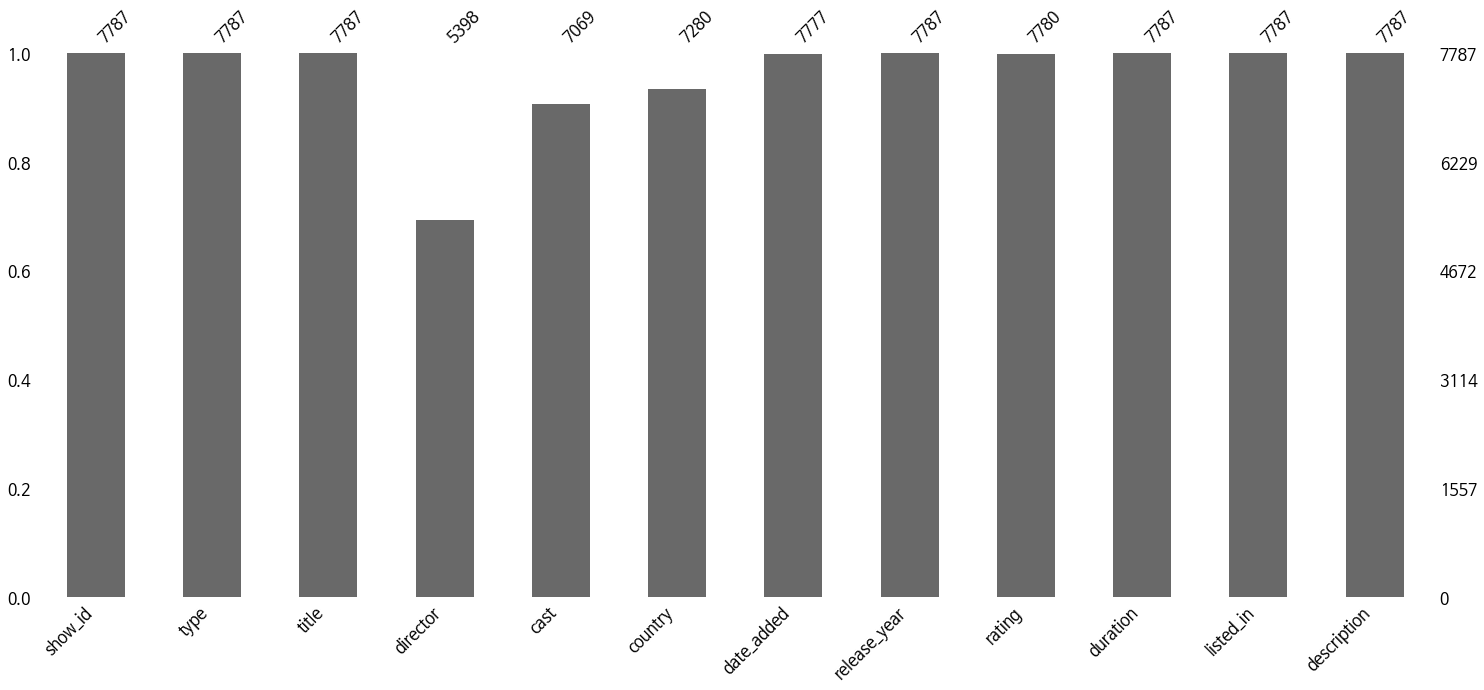

In [149]:
msno.bar(data)

bar 에서 볼수 있듯 director, cast, country,data_added, rating 값이 비어있는 부분이 있는것을 확인할수 있습니다.

이번엔 결측값의 수를 출력해봅니다

In [150]:
data.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [151]:
data.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

이제 결측값 보정을 할 차례인데 위 고유값에 보이듯 rating의 고유값은 14개인데 결측값은 7개뿐입니다 그러므로 rating 컬럼을 보정합니다

In [152]:
data.loc[data['rating'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
67,s68,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
2359,s2360,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
3660,s3661,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
3736,s3737,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
3737,s3738,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
3738,s3739,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...
4323,s4324,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


확인해 보면 영상물 등급 제도에 대한 rating인데 이는 제목 검색 후 채워 넣었습니다

In [153]:
rating_replacements = {
    67:'TV-PG',
    2359:'TV-14',
    3660:'TV-MA',
    3736:'TV-MA',
    3737:'NR',
    3738: 'TV-MA',
    4323: 'TV-MA'
}

for id,rate in rating_replacements.items():
  data.iloc[id,8] = rate

In [154]:
data['rating'].isna().sum()

0

rating 결측값이 없는것을 확인할수 있습니다. 이후 결측값이 많은 director와 cast 컬럼은 감독과 배우들을 직접 넣을수 없으니 삭제하기로 합니다

In [155]:
data = data.drop(['director','cast'], axis=1)
data.columns

Index(['show_id', 'type', 'title', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

data_added는 빈 데이터가 있는 열을 삭제하기로 합니다

In [156]:
data = data[data["date_added"].notna()]

country는 The Simple Imputation중 mode 최빈값으로 채우기로 합니다

In [157]:
data['country'] = data['country'].fillna(data['country'].mode()[0])

모든 결측값을 보정하였으니 결측값이 있는지 재확인합니다

In [158]:
data.isna().sum()

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [159]:
data["date_added"] = pd.to_datetime(data['date_added'])

data['month_added']=data['date_added'].dt.month
data['month_name_added']=data['date_added'].dt.month_name()
data['year_added'] = data['date_added'].dt.year

이제 데이터를 시각화 합니다

일관된 색상표를 사용하는 것은 분석에 신뢰성을 주는 좋은 방법입니다. 이는 매우 전문적으로 보이고, 사람들의 흥미를 발생시켜줍니다.

https://www.analyticsvidhya.com/blog/2021/07/visualizing-netflix-data-using-python/ 을 참조하여 코드 구성하였습니다

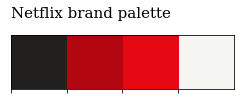

In [160]:
sns.palplot(['#221f1f', '#b20710', '#e50914','#f5f5f1'])

plt.title("Netflix brand palette ",loc='left',fontfamily='serif',fontsize=15,y=1.2)
plt.show()

In [161]:
x=data.groupby(['type'])['type'].count()
y=len(data)
r=((x/y)).round(2)

mf_ratio = pd.DataFrame(r).T

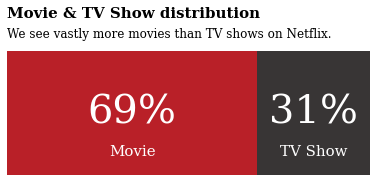

In [162]:
fig, ax = plt.subplots(1,1,figsize=(6.5, 2.5))

ax.barh(mf_ratio.index, mf_ratio['Movie'], 
        color='#b20710', alpha=0.9, label='Male')
ax.barh(mf_ratio.index, mf_ratio['TV Show'], left=mf_ratio['Movie'], 
        color='#221f1f', alpha=0.9, label='Female')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])

for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['Movie'][i]*100)}%", 
                   xy=(mf_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                   color='white')

    ax.annotate("Movie", 
                   xy=(mf_ratio['Movie'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')
    
    
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['TV Show'][i]*100)}%", 
                   xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                   color='white')
    ax.annotate("TV Show", 
                   xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')

fig.text(0.125,1.03,'Movie & TV Show distribution', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.92,'We see vastly more movies than TV shows on Netflix.',fontfamily='serif',fontsize=12)  

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
ax.legend().set_visible(False)
plt.show()

넷플릭스에선 TV쇼 보다 영화가 더 많은것을 알 수 있습니다

그럼 넷플릭스 사용량 Top 10 국가들의 TV쇼와 영화 분포는 어떨까요?

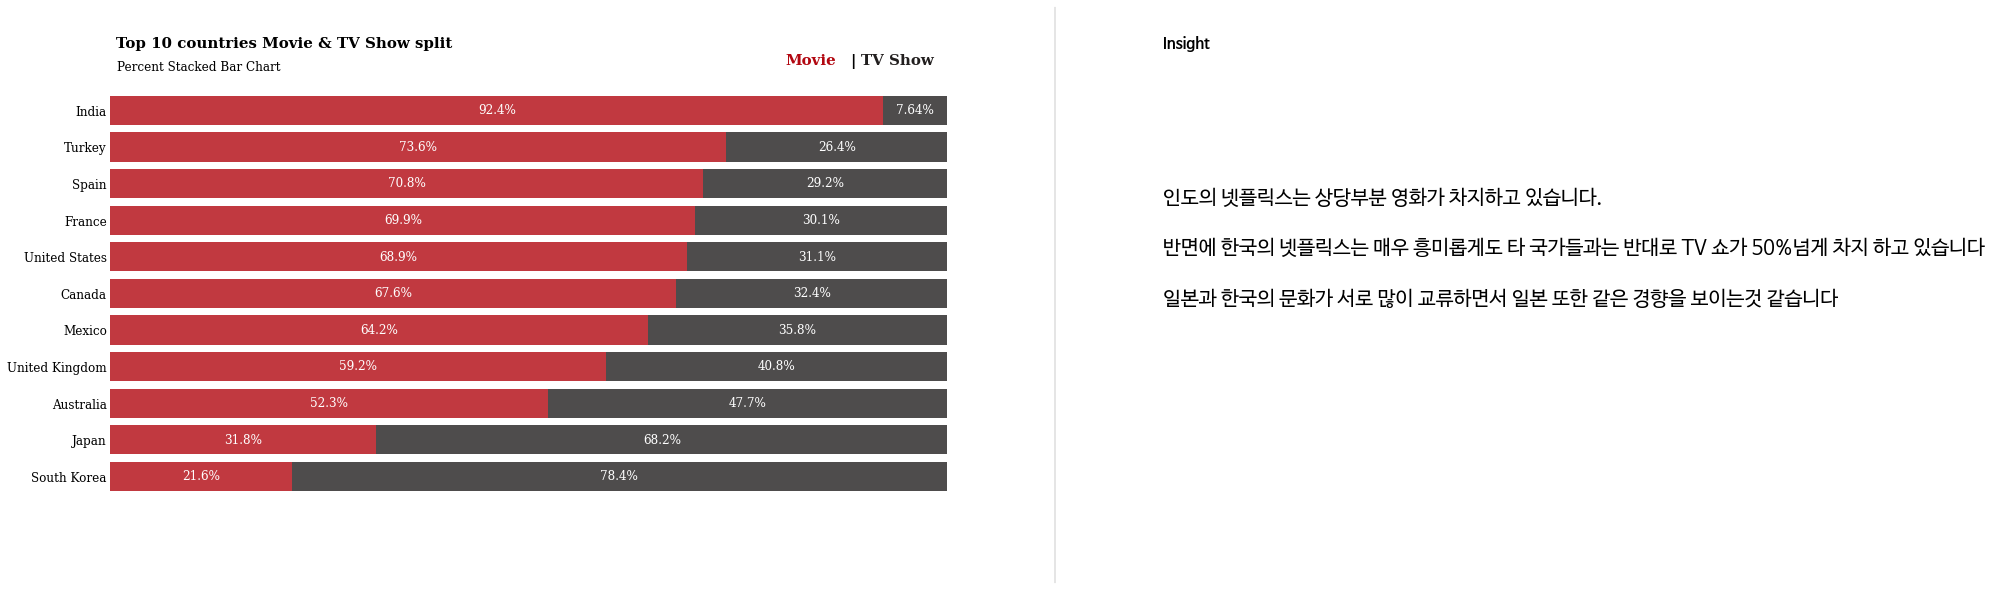

In [163]:
data['count'] = 1
data['first_country'] = data['country'].apply(lambda x: x.split(",")[0])
data['first_country'].head()

country_order =data['first_country'].value_counts()[:11].index
data_q2q3 =data[['type', 'first_country']].groupby('first_country')['type'].value_counts().unstack().loc[country_order]
data_q2q3['sum'] = data_q2q3.sum(axis=1)
data_q2q3_ratio = (data_q2q3.T / data_q2q3['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]

fig, ax = plt.subplots(1,1,figsize=(15, 8),)

ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Movie'], 
        color='#b20710', alpha=0.8, label='Movie')
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['TV Show'], left=data_q2q3_ratio['Movie'], 
        color='#221f1f', alpha=0.8, label='TV Show')


ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticklabels(data_q2q3_ratio.index, fontfamily='serif', fontsize=11)

for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['Movie'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')

for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['TV Show'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Movie'][i]+data_q2q3_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')
    

fig.text(0.13, 0.93, 'Top 10 countries Movie & TV Show split', fontsize=15, fontweight='bold', fontfamily='serif')   
fig.text(0.131, 0.89, 'Percent Stacked Bar Chart', fontsize=12,fontfamily='serif')   

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    

fig.text(0.75,0.9,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.81,0.9,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.82,0.9,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')


fig.text(1.1, 0.93, 'Insight', fontsize=15, fontweight='bold', fontfamily='NanumBarunGothic')

fig.text(1.1, 0.44, '''
인도의 넷플릭스는 상당부분 영화가 차지하고 있습니다.

반면에 한국의 넷플릭스는 매우 흥미롭게도 타 국가들과는 반대로 TV 쇼가 50%넘게 차지 하고 있습니다

일본과 한국의 문화가 서로 많이 교류하면서 일본 또한 같은 경향을 보이는것 같습니다
'''
         , fontsize=20, fontweight='light', fontfamily='NanumBarunGothic')



import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])




ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

다음으로 한 해 동안 어떻게 컨텐츠가 추가되는 방법을 알아봅니다

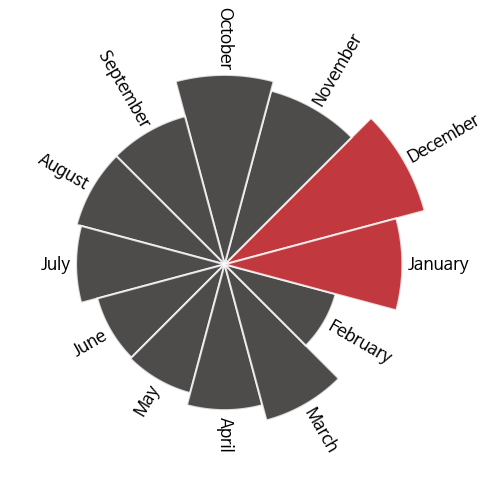

In [164]:
month_order = ['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

data['month_name_added'] = pd.Categorical(data['month_name_added'], categories=month_order, ordered=True)

data_sub2 = data_sub

data_sub2['Value'] = data_sub2['Movie'] + data_sub2['TV Show']
data_sub2 = data_sub2.reset_index()

data_polar = data_sub2.sort_values(by='month_name_added',ascending=False)


color_map = ['#221f1f' for _ in range(12)]
color_map[0] = color_map[11] =  '#b20710'

plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)
plt.axis('off')

upperLimit = 30
lowerLimit = 1
labelPadding = 30
max = data_polar['Value'].max()

slope = (max - lowerLimit) / max
heights = slope * data_polar.Value + lowerLimit

width = 2*np.pi / len(data_polar.index)

indexes = list(range(1, len(data_polar.index)+1))
angles = [element * width for element in indexes]
angles

bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color=color_map,alpha=0.8
)

for bar, angle, height, label in zip(bars,angles, heights, data_polar["month_name_added"]):

    rotation = np.rad2deg(angle)

    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, fontsize=17,fontfamily='NanumBarunGothic',
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 

12월과 1월은 확실히 새로운 콘텐츠를 즐기기 가장 좋은 달입니다. 
어쩌면 넷플릭스는 사람들이 이 기간 동안 일을 쉬고 집에서 쉬면서
영화나 TV쇼를 시청하기에 가장 좋은 달 인것을 알고 있는것 같습니다

다음은 장르 사이의 상관관계(Correlation)입니다

In [165]:
from sklearn.preprocessing import MultiLabelBinarizer 

import matplotlib.colors

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710','#f5f5f1'])

def genre_heatmap(df, title):
    df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
    Types = []
    for i in df['genre']: Types += i
    Types = set(Types)
    print("There are {} types in the Netflix {} Dataset".format(len(Types),title))    
    test = df['genre']
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(10, 7))
    fig.text(.54,.88,'Genre correlation', fontfamily='NanumBarunGothic',fontweight='bold',fontsize=15)
    fig.text(.75,.665,
            '''
             독립영화는 드라마인 경향이 있다는 점이 흥미롭습니다.
            국제 영화는 어린이 장르에 거의 없다는 점 또한 흥미롭습니다
             ''', fontfamily='NanumBarunGothic',fontsize=12,ha='right')
    pl = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, vmin=-.3, center=0, square=True, linewidths=2.5)
    
    plt.show()

There are 20 types in the Netflix Movie Dataset


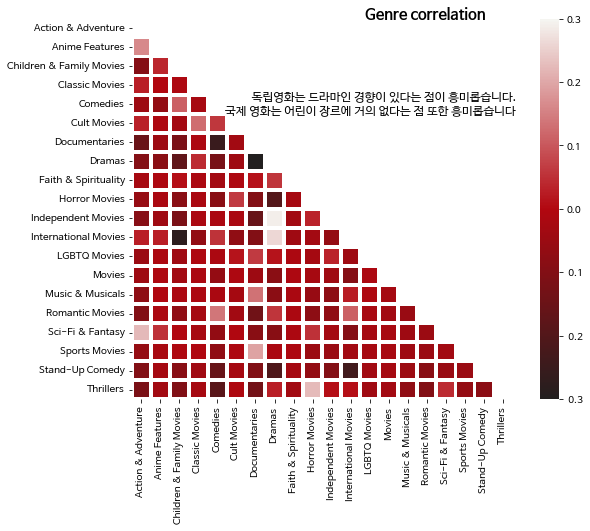

In [166]:
data_tv = data[data["type"] == "TV Show"]
data_movies = data[data["type"] == "Movie"]


genre_heatmap(data_movies, 'Movie')
plt.show()

많이 부족하지만 시청해주셔서 감사합니다